# Data Loading and Assessing

In [1]:
# Importing required libraries
import pandas as pd
import os

# Define the directories for plantvillage and plantdoc
base_dir = r'C:\Users\bheja\OneDrive\Desktop\Dataset'
plant_vil_dir = os.path.join(base_dir, 'plantvillage')
plant_doc_dir = os.path.join(base_dir, 'plantdoc')

# Load the CSV files
train_csv_path = os.path.join(base_dir, 'PV_train.csv')
test_seen_csv_path = os.path.join(base_dir, 'PV_test_seen.csv')
test_unseen_csv_path = os.path.join(base_dir, 'PV_test_unseen.csv')
doc_unseen_csv_path = os.path.join(base_dir, 'PD_test_unseen.csv')

# Read the CSV files into pandas DataFrames
train_data = pd.read_csv(train_csv_path, header=None, names=["image_name", "crop_class", "disease_class"])
test_seen_data = pd.read_csv(test_seen_csv_path, header=None, names=["image_name", "crop_class", "disease_class"])
test_unseen_data = pd.read_csv(test_unseen_csv_path, header=None, names=["image_name", "crop_class", "disease_class"])
doc_unseen_data = pd.read_csv(doc_unseen_csv_path, header=None, names=["image_name", "crop_class", "disease_class"])

# Print the first few rows of each dataframe to verify
print("Training data (first few rows):")
print(train_data.head())

print("\nTest seen data (first few rows):")
print(test_seen_data.head())

print("\nTest unseen data (first few rows):")
print(test_unseen_data.head())

print("\nDoc unseen data (first few rows):")
print(doc_unseen_data.head())


Training data (first few rows):
                                          image_name  crop_class  \
0  4b22a1e7-745b-4c78-a49e-14ca8cfba26a___RS_HL-8...           0   
1  9ee2b5e6-46cf-400f-a82f-660a2ac05157___RS_HL-5...           0   
2  181ce194-fdc9-4f0b-ae8d-0c621f723279___RS_HL-7...           0   
3  3e8eb97c-b2ad-4aeb-82ff-2f1334801c9b___RS_HL-6...           0   
4  4e817ac6-818a-431f-af6d-e44477f9b649___RS_HL-7...           0   

   disease_class  
0              0  
1              0  
2              0  
3              0  
4              0  

Test seen data (first few rows):
                                          image_name  crop_class  \
0  db172d76-ff08-4bd5-bd0b-6231f432434a___RS_HL-5...           0   
1  c2aa2c88-d07b-4df4-80c7-1ba703254844___RS_HL-5...           0   
2  d57f5f33-d8e9-4c40-80ad-c2875743f781___RS_HL-5...           0   
3  83636c4e-c4f1-47c4-81e8-0bcf7bac8995___RS_HL-5...           0   
4  398f4455-d008-4d69-a58d-b0a1f228abaa___RS_HL-5...           0   

  

In [2]:
# Function to count and print the number of images per class in order (sequentially from 0 upwards)
def count_class_images(data, class_column, class_type, num_classes):
    print(f"{class_type} class counts (ordered):")
    for class_idx in range(num_classes):  # Iterate through all possible class indices in order
        count = (data[class_column] == class_idx).sum()  # Count images for each class
        print(f"Class {class_idx}: {count} images")
    print()

# Count the images for crop and disease classes in the training data (ordered)
count_class_images(train_data, 'crop_class', 'Crop', num_classes=14)  # 14 crop classes
count_class_images(train_data, 'disease_class', 'Disease', num_classes=21)  # 21 disease classes


Crop class counts (ordered):
Class 0: 2202 images
Class 1: 1000 images
Class 2: 1651 images
Class 3: 3095 images
Class 4: 3152 images
Class 5: 4361 images
Class 6: 2099 images
Class 7: 1267 images
Class 8: 1708 images
Class 9: 208 images
Class 10: 1000 images
Class 11: 1503 images
Class 12: 1319 images
Class 13: 14429 images

Disease class counts (ordered):
Class 0: 8237 images
Class 1: 498 images
Class 2: 1368 images
Class 3: 220 images
Class 4: 2451 images
Class 5: 409 images
Class 6: 954 images
Class 7: 798 images
Class 8: 1099 images
Class 9: 828 images
Class 10: 4361 images
Class 11: 3558 images
Class 12: 1663 images
Class 13: 2328 images
Class 14: 931 images
Class 15: 768 images
Class 16: 1456 images
Class 17: 1312 images
Class 18: 1136 images
Class 19: 4312 images
Class 20: 307 images



# Processing

In [3]:
# Print the data types of the columns in the DataFrame
print("Data types of columns in train_data:")
print(train_data.dtypes)

# Print the data types for the specific columns (crop_class and disease_class)
print("\nData type of 'crop_class' column:", train_data["crop_class"].dtype)
print("Data type of 'disease_class' column:", train_data["disease_class"].dtype)


Data types of columns in train_data:
image_name       object
crop_class        int64
disease_class     int64
dtype: object

Data type of 'crop_class' column: int64
Data type of 'disease_class' column: int64


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# ImageNet Mean and Std for normalization
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Define the directories
plant_vil_dir = r'C:\Users\bheja\OneDrive\Desktop\Dataset\plantvillage'
plant_doc_dir = r'C:\Users\bheja\OneDrive\Desktop\Dataset\plantdoc'

# Load the CSV file into a DataFrame
train_csv_path = r'C:\Users\bheja\OneDrive\Desktop\Dataset\PV_train.csv'
train_data = pd.read_csv(train_csv_path, header=None, names=["image_name", "crop_class", "disease_class"])

# Load the test seen CSV file to use for testing
test_seen_csv_path = r'C:\Users\bheja\OneDrive\Desktop\Dataset\PV_test_seen.csv'
test_seen_data = pd.read_csv(test_seen_csv_path, header=None, names=["image_name", "crop_class", "disease_class"])

# Instead of splitting train data, using the seen test data for evaluation
print("Train data sample:")
print(train_data.head())

print("\nTest seen data sample:")
print(test_seen_data.head())


Train data sample:
                                          image_name  crop_class  \
0  4b22a1e7-745b-4c78-a49e-14ca8cfba26a___RS_HL-8...           0   
1  9ee2b5e6-46cf-400f-a82f-660a2ac05157___RS_HL-5...           0   
2  181ce194-fdc9-4f0b-ae8d-0c621f723279___RS_HL-7...           0   
3  3e8eb97c-b2ad-4aeb-82ff-2f1334801c9b___RS_HL-6...           0   
4  4e817ac6-818a-431f-af6d-e44477f9b649___RS_HL-7...           0   

   disease_class  
0              0  
1              0  
2              0  
3              0  
4              0  

Test seen data sample:
                                          image_name  crop_class  \
0  db172d76-ff08-4bd5-bd0b-6231f432434a___RS_HL-5...           0   
1  c2aa2c88-d07b-4df4-80c7-1ba703254844___RS_HL-5...           0   
2  d57f5f33-d8e9-4c40-80ad-c2875743f781___RS_HL-5...           0   
3  83636c4e-c4f1-47c4-81e8-0bcf7bac8995___RS_HL-5...           0   
4  398f4455-d008-4d69-a58d-b0a1f228abaa___RS_HL-5...           0   

   disease_class  
0     

In [5]:
# Changing 'astype' to avoid TypeError with ImageDataGenerator
train_data["crop_class"] = train_data["crop_class"].astype(str)
train_data["disease_class"] = train_data["disease_class"].astype(str)

test_seen_data["crop_class"] = test_seen_data["crop_class"].astype(str)
test_seen_data["disease_class"] = test_seen_data["disease_class"].astype(str)

test_unseen_data["crop_class"] = test_unseen_data["crop_class"].astype(str)
test_unseen_data["disease_class"] = test_unseen_data["disease_class"].astype(str)

doc_unseen_data["crop_class"] = doc_unseen_data["crop_class"].astype(str)
doc_unseen_data["disease_class"] = doc_unseen_data["disease_class"].astype(str)


In [6]:
# Data Augmentation and Preprocessing setup for training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1] range
    rotation_range=60,  # Random rotation between 0 to 40 degrees
    width_shift_range=0.3,  # Random horizontal shifts
    height_shift_range=0.3,  # Random vertical shifts
    shear_range=0.3,  # Shear angle in counter-clockwise direction
    zoom_range=0.3,  # Random zoom in and out
    horizontal_flip=True,  # Randomly flip images horizontally
    brightness_range=[0.7, 1.3],  # Random brightness adjustments
    fill_mode='nearest',  # Fill in newly created pixels after transformation
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input  # Normalize using ImageNet stats
)

# For validation/test data, no augmentation, only normalization
test_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1] range
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input  # Normalize using ImageNet stats
)

# Flow training data through the ImageDataGenerator (crop_class as multi-class)
train_generator_crop = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=plant_vil_dir,  # Directory where the images are stored
    x_col="image_name",  # Column that contains the image filenames
    y_col="crop_class",  # Only the crop class for single output
    target_size=(224, 224),  # Resize images to 224x224 (required for ResNet)
    batch_size=32,
    class_mode='categorical',  # Single label per image (one-hot encoding)
    shuffle=True  # Shuffle data during training
)

# Flow training data for disease classification (single output)
train_generator_disease = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=plant_vil_dir,  # Directory where the images are stored
    x_col="image_name",  # Column that contains the image filenames
    y_col="disease_class",  # Only the disease class for single output
    target_size=(224, 224),  # Resize images to 224x224 (required for ResNet)
    batch_size=32,
    class_mode='categorical',  # Single label per image (one-hot encoding)
    shuffle=True  # Shuffle data during training
)


Found 38994 validated image filenames belonging to 14 classes.
Found 38994 validated image filenames belonging to 21 classes.


In [7]:
classes_list = [str(i) for i in range(len(train_generator_crop.class_indices))]
classes_list_disease = [str(i) for i in range(len(train_generator_disease.class_indices))]


# Flow validation/test data (no augmentation, only normalization) for crop classification
test_seen_generator_crop = test_datagen.flow_from_dataframe(
    dataframe=test_seen_data,
    directory=plant_vil_dir,  # Use plantvillage directory for seen test images
    x_col="image_name",
    y_col="crop_class",  # Only the crop class for single output
    target_size=(224, 224),  # Resize to match ResNet input
    batch_size=8,
    class_mode='categorical',  # Single label per image (one-hot encoding)
    classes=classes_list,  # Ensure all classes are accounted for
    shuffle=False  # No shuffle for test data
)

test_unseen_generator_crop = test_datagen.flow_from_dataframe(
    dataframe=test_unseen_data,
    directory=plant_vil_dir,  # Use plantvillage directory for unseen test images
    x_col="image_name",
    y_col="crop_class",  # Only the crop class for single output
    target_size=(224, 224),  # Resize to match ResNet input
    batch_size=8,
    class_mode='categorical',  # Single label per image (one-hot encoding)
    classes=classes_list,  # Ensure all classes are accounted for
    shuffle=False  # No shuffle for test data
)

doc_unseen_generator_crop = test_datagen.flow_from_dataframe(
    dataframe=doc_unseen_data,
    directory=plant_doc_dir,  # Use plantdoc directory for unseen lab test images
    x_col="image_name",
    y_col="crop_class",  # Only the crop class for single output
    target_size=(224, 224),  # Resize to match ResNet input
    batch_size=8,
    class_mode='categorical',  # Single label per image (one-hot encoding)
    classes=classes_list,  # Ensure all classes are accounted for
    shuffle=False  # No shuffle for test data
)

# Flow validation/test data for disease classification (single output)
test_seen_generator_disease = test_datagen.flow_from_dataframe(
    dataframe=test_seen_data,
    directory=plant_vil_dir,
    x_col="image_name",
    y_col="disease_class",  # Only the disease class for single output
    target_size=(224, 224),
    batch_size=8,
    classes=classes_list_disease,
    class_mode='categorical',
    shuffle=False
)

test_unseen_generator_disease = test_datagen.flow_from_dataframe(
    dataframe=test_unseen_data,
    directory=plant_vil_dir,
    x_col="image_name",
    y_col="disease_class",  # Only the disease class for single output
    target_size=(224, 224),
    batch_size=8,
    classes=classes_list_disease,
    class_mode='categorical',
    shuffle=False
)

doc_unseen_generator_disease = test_datagen.flow_from_dataframe(
    dataframe=doc_unseen_data,
    directory=plant_doc_dir,
    x_col="image_name",
    y_col="disease_class",  # Only the disease class for single output
    target_size=(224, 224),
    batch_size=8,
    classes=classes_list_disease,
    class_mode='categorical',
    shuffle=False
)


Found 10279 validated image filenames belonging to 14 classes.
Found 216 validated image filenames belonging to 14 classes.
Found 71 validated image filenames belonging to 14 classes.
Found 10279 validated image filenames belonging to 21 classes.
Found 216 validated image filenames belonging to 21 classes.
Found 71 validated image filenames belonging to 21 classes.


## different data sizes

In [8]:
import numpy as np

# Count the number of images for each crop class and disease class
crop_class_counts = train_data['crop_class'].value_counts()
disease_class_counts = train_data['disease_class'].value_counts()

print("Crop Class Distribution:")
print(crop_class_counts)

print("\nDisease Class Distribution:")
print(disease_class_counts)


Crop Class Distribution:
crop_class
13    14429
5      4361
4      3152
3      3095
0      2202
6      2099
8      1708
2      1651
11     1503
12     1319
7      1267
1      1000
10     1000
9       208
Name: count, dtype: int64

Disease Class Distribution:
disease_class
0     8237
10    4361
19    4312
11    3558
4     2451
13    2328
12    1663
16    1456
2     1368
17    1312
18    1136
8     1099
6      954
14     931
9      828
7      798
15     768
1      498
5      409
20     307
3      220
Name: count, dtype: int64


# CROP MODEL

In [9]:
# Check the number of images per crop class
crop_class_counts = train_data['crop_class'].value_counts()
print("Crop Class Distribution:")
print(crop_class_counts)


Crop Class Distribution:
crop_class
13    14429
5      4361
4      3152
3      3095
0      2202
6      2099
8      1708
2      1651
11     1503
12     1319
7      1267
1      1000
10     1000
9       208
Name: count, dtype: int64


In [10]:
# Load only the necessary columns (image_name and crop_class) for now
train_data_crops = train_data[['image_name', 'crop_class']]

# Check the first few rows to ensure the data is correct
print(train_data_crops.head())


                                          image_name crop_class
0  4b22a1e7-745b-4c78-a49e-14ca8cfba26a___RS_HL-8...          0
1  9ee2b5e6-46cf-400f-a82f-660a2ac05157___RS_HL-5...          0
2  181ce194-fdc9-4f0b-ae8d-0c621f723279___RS_HL-7...          0
3  3e8eb97c-b2ad-4aeb-82ff-2f1334801c9b___RS_HL-6...          0
4  4e817ac6-818a-431f-af6d-e44477f9b649___RS_HL-7...          0


In [11]:
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import numpy as np

# Get the crop class labels (assuming these are already strings, so we need to convert to integers first)
y_crop = train_data_crops['crop_class'].astype(int).values  # Convert to int

# Apply SMOTE for oversampling (SMOTE requires numerical data)
smote = SMOTE(sampling_strategy='auto', random_state=42)

# We need to reshape X to match SMOTE input format; here X is just dummy data (zeros)
X_resampled, y_crop_resampled = smote.fit_resample(np.zeros((len(y_crop), 1)), y_crop)

# Calculate class weights for the crop classes (requires integer labels)
crop_class_weights = compute_class_weight('balanced', classes=np.unique(y_crop), y=y_crop)
class_weights = dict(zip(np.unique(y_crop), crop_class_weights))

# Print the class weights
print("Class Weights (for Crop Classes):")
print(class_weights)

# Now, convert y_crop_resampled back to strings for compatibility with ImageGenerator
y_crop_resampled = y_crop_resampled.astype(str)

# Check the new distribution of crop classes after SMOTE
print("New Crop Class Distribution (After SMOTE):")
print(np.bincount(y_crop_resampled.astype(int)))  # Convert to int temporarily for counting


Class Weights (for Crop Classes):
{0: 1.2648890618917867, 1: 2.785285714285714, 2: 1.6870295059271436, 3: 0.8999307639049158, 4: 0.8836566352429297, 5: 0.6386805123333442, 6: 1.326958415572041, 7: 2.198331266208141, 8: 1.6307293409166945, 9: 13.390796703296703, 10: 2.785285714285714, 11: 1.8531508411747932, 12: 2.1116646810354163, 13: 0.19303387028108077}
New Crop Class Distribution (After SMOTE):
[14429 14429 14429 14429 14429 14429 14429 14429 14429 14429 14429 14429
 14429 14429]


### Training

In [21]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall, AUC
import numpy as np

# Load ResNet50 from scratch (no pre-trained weights)
base_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))

# Freeze the initial 100 layers
for layer in base_model.layers[:100]:
    layer.trainable = False

# Only the later layers are trainable
for layer in base_model.layers[100:]:
    layer.trainable = True

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)  # Dropout to prevent overfitting
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(len(np.unique(y_crop)), activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with a higher initial learning rate since we're starting from scratch
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Define callbacks for training
checkpoint_scratch = ModelCheckpoint(filepath=r'C:\Users\bheja\OneDrive\Desktop\models\model_scratch_checkpoint.h5',
                                     monitor='val_loss',
                                     save_best_only=True,
                                     save_weights_only=False,
                                     verbose=1)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',          # Monitor validation loss to decide when to reduce the learning rate
    factor=0.5,                  # Reduce learning rate by a factor of 0.5 (i.e., halve it)
    patience=3,                  # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-7,                 # Lower bound on the learning rate to prevent it from going too low
    verbose=1                    # Prints a message when learning rate is reduced
)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model from scratch
history_scratch = model.fit(
    train_generator_crop,
    epochs=100,  # Training from scratch will need more epochs
    batch_size=8, 
    validation_data=test_seen_generator_crop,
    class_weight=class_weights,  # Use class weights for imbalance
    callbacks=[reduce_lr, early_stop, checkpoint_scratch]
)


Epoch 1/100
1219/1219 [==============================] - ETA: 0s - loss: 3.2759 - accuracy: 0.3203 - precision_8: 0.4936 - recall_8: 0.1405 - auc_8: 0.7916
Epoch 1: val_loss improved from inf to 8.05662, saving model to C:\Users\bheja\OneDrive\Desktop\models\model_scratch_checkpoint.h5
1219/1219 [==============================] - 1075s 875ms/step - loss: 3.2759 - accuracy: 0.3203 - precision_8: 0.4936 - recall_8: 0.1405 - auc_8: 0.7916 - val_loss: 8.0566 - val_accuracy: 0.2552 - val_precision_8: 0.2501 - val_recall_8: 0.1501 - val_auc_8: 0.6759 - lr: 0.0010
Epoch 2/100
1219/1219 [==============================] - ETA: 0s - loss: 2.5221 - accuracy: 0.3967 - precision_8: 0.5852 - recall_8: 0.1895 - auc_8: 0.8619
Epoch 2: val_loss improved from 8.05662 to 1.92201, saving model to C:\Users\bheja\OneDrive\Desktop\models\model_scratch_checkpoint.h5
1219/1219 [==============================] - 704s 577ms/step - loss: 2.5221 - accuracy: 0.3967 - precision_8: 0.5852 - recall_8: 0.1895 - auc_8: 

In [ ]:
## Saving the model

In [23]:
model.save(r'C:\Users\bheja\OneDrive\Desktop\models\baseline_crop.h5')

## Testing on other test datasets

In [10]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score
import tensorflow as tf
import numpy as np
from tensorflow.keras.metrics import Precision, Recall, AUC  # Import these metrics

# Load the saved model
model = tf.keras.models.load_model(r'C:\Users\bheja\OneDrive\Desktop\models\baseline_crop.h5', 
                                   custom_objects={'Precision': Precision, 'Recall': Recall, 'AUC': AUC})

# Compile the model with a higher initial learning rate since we're starting from scratch
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])


### accuracy on other test datasets

In [36]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
import numpy as np

# Load the saved model
model = tf.keras.models.load_model(r'C:\Users\bheja\OneDrive\Desktop\models\baseline_crop.h5', custom_objects={'Precision': Precision, 'Recall': Recall, 'AUC': AUC})

# Evaluate the model on PV unseen test data
pv_unseen_loss, pv_unseen_accuracy, pv_unseen_precision, pv_unseen_recall, pv_unseen_auc = model.evaluate(test_unseen_generator_crop)
print("PV Unseen Test Data Accuracy:", pv_unseen_accuracy)

# Evaluate the model on PD unseen test data
pd_unseen_loss, pd_unseen_accuracy, pd_unseen_precision, pd_unseen_recall, pd_unseen_auc = model.evaluate(doc_unseen_generator_crop)
print("PD Unseen Test Data Accuracy:", pd_unseen_accuracy)

27/27 [==============================] - 3s 42ms/step - loss: 10.2304 - accuracy: 0.0000e+00 - precision_8: 0.0000e+00 - recall_8: 0.0000e+00 - auc_8: 0.3032
PV Unseen Test Data Accuracy: 0.0
9/9 [==============================] - 1s 103ms/step - loss: 4.8309 - accuracy: 0.2535 - precision_8: 0.2167 - recall_8: 0.1831 - auc_8: 0.6320
PD Unseen Test Data Accuracy: 0.2535211145877838


### harmonic mean

In [37]:
# Calculate harmonic mean between seen and unseen accuracies of PV dataset
pv_seen_loss, pv_seen_accuracy, pv_seen_precision, pv_seen_recall, pv_seen_auc = model.evaluate(test_seen_generator_crop)
harmonic_mean_accuracy = 2 * (pv_seen_accuracy * pv_unseen_accuracy) / (pv_seen_accuracy + pv_unseen_accuracy)
print("Harmonic Mean Accuracy between PV Seen and Unseen:", harmonic_mean_accuracy)

1285/1285 [==============================] - 54s 42ms/step - loss: 14.9980 - accuracy: 0.0747 - precision_8: 0.0744 - recall_8: 0.0723 - auc_8: 0.4844
Harmonic Mean Accuracy between PV Seen and Unseen: 0.0


### Top-n accuracy

In [11]:
# Evaluate the model on PV unseen test data
# Generate predictions on PV unseen test data
predictions_pv = model.predict(test_unseen_generator_crop, batch_size=4)  # Reduce batch size for predictions

# Get the true labels from the generator
true_labels_pv = test_unseen_generator_crop.classes

# Top-1 Accuracy for PV Unseen Test Data
top_1_predictions_pv = np.argmax(predictions_pv, axis=1)
top_1_accuracy_pv = accuracy_score(true_labels_pv, top_1_predictions_pv)
print("Top-1 Accuracy on PV Unseen Test Data:", top_1_accuracy_pv)

# Top-5 Accuracy for PV Unseen Test Data
top_5_predictions_pv = np.argsort(predictions_pv, axis=1)[:, -5:]
top_5_accuracy_pv = np.mean([true_labels_pv[i] in top_5_predictions_pv[i] for i in range(len(true_labels_pv))])
print("Top-5 Accuracy on PV Unseen Test Data:", top_5_accuracy_pv)

# Evaluate the model on PD unseen test data
# Generate predictions on PD unseen test data
predictions_pd = model.predict(doc_unseen_generator_crop)

# Get the true labels from the generator
true_labels_pd = doc_unseen_generator_crop.classes

# Top-1 Accuracy for PD Unseen Test Data
top_1_predictions_pd = np.argmax(predictions_pd, axis=1)
top_1_accuracy_pd = accuracy_score(true_labels_pd, top_1_predictions_pd)
print("Top-1 Accuracy on PD Unseen Test Data:", top_1_accuracy_pd)

# Top-5 Accuracy for PD Unseen Test Data
top_5_predictions_pd = np.argsort(predictions_pd, axis=1)[:, -5:]
top_5_accuracy_pd = np.mean([true_labels_pd[i] in top_5_predictions_pd[i] for i in range(len(true_labels_pd))])
print("Top-5 Accuracy on PD Unseen Test Data:", top_5_accuracy_pd)


27/27 [==============================] - 10s 71ms/step
Top-1 Accuracy on PV Unseen Test Data: 0.0
Top-5 Accuracy on PV Unseen Test Data: 0.004629629629629629
9/9 [==============================] - 3s 411ms/step
Top-1 Accuracy on PD Unseen Test Data: 0.2535211267605634
Top-5 Accuracy on PD Unseen Test Data: 0.5633802816901409


In [12]:
# Generate predictions on PV Test Seen Data
predictions_pv_seen = model.predict(test_seen_generator_crop)

# Get the true labels from the generator
true_labels_pv_seen = test_seen_generator_crop.classes

# Top-1 Accuracy for PV Seen Test Data
top_1_predictions_pv_seen = np.argmax(predictions_pv_seen, axis=1)
top_1_accuracy_pv_seen = accuracy_score(true_labels_pv_seen, top_1_predictions_pv_seen)
print("Top-1 Accuracy on PV Seen Test Data:", top_1_accuracy_pv_seen)

# Top-5 Accuracy for PV Seen Test Data
top_5_predictions_pv_seen = np.argsort(predictions_pv_seen, axis=1)[:, -5:]
top_5_accuracy_pv_seen = np.mean([true_labels_pv_seen[i] in top_5_predictions_pv_seen[i] for i in range(len(true_labels_pv_seen))])
print("Top-5 Accuracy on PV Seen Test Data:", top_5_accuracy_pv_seen)


1285/1285 [==============================] - 101s 78ms/step
Top-1 Accuracy on PV Seen Test Data: 0.07471543924506274
Top-5 Accuracy on PV Seen Test Data: 0.4272789181827026


### Confusion Matrix

In [50]:
# Import necessary libraries for evaluation
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions on PV seen test set
pv_seen_predictions = model.predict(test_seen_generator_crop)

# Get predicted class indices from the softmax output (i.e., the class with the highest score)
pv_seen_pred_classes = np.argmax(pv_seen_predictions, axis=1)

# Get the true labels from the generator
true_labels_pv_seen = test_seen_generator_crop.classes

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels_pv_seen, pv_seen_pred_classes)
print("Confusion Matrix for PV Test Seen Data:")
print(conf_matrix)


1285/1285 [==============================] - 49s 38ms/step
Confusion Matrix for PV Test Seen Data:
[[ 486   11    6    2    4   61   31    1    4    2    5    7   13    0]
 [   3  257    0    0    1   10    0    0    0    0    0    0    0    0]
 [   0    0    7    0    0    5  241    0    0    0    0    1    1    0]
 [   2    0    1    3    0    1    0  750    0    0    0    0    0    0]
 [   3    0    4    0    1   44    0    0  855    2    0    0    1    0]
 [   2    0    1    0    0    4    0    0    2 1133    0    2    2    0]
 [  11    0    0    0    0    9    1    0    5    0  530    0    2    0]
 [   2    0   30    0    0    6    3    0    2    0    0  159    9    0]
 [   5    0    5    0    8   33    1    0    2    0    0    1  389    0]
 [   0    0   34    0    2   27    2    0   18    0    0    0   16   64]
 [   4    0  853    0    0    8   17    0    0    1    0    4    1    0]
 [   0    0    0  323    0    4    0    2    2    0    0    0    1    0]
 [   0    2    4    5  22

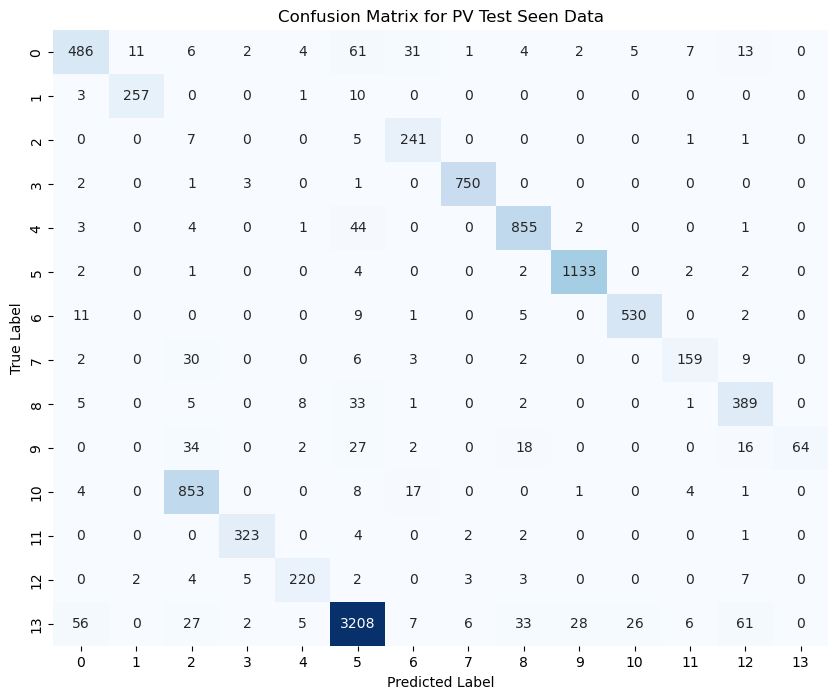

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="g", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for PV Test Seen Data")
plt.show()


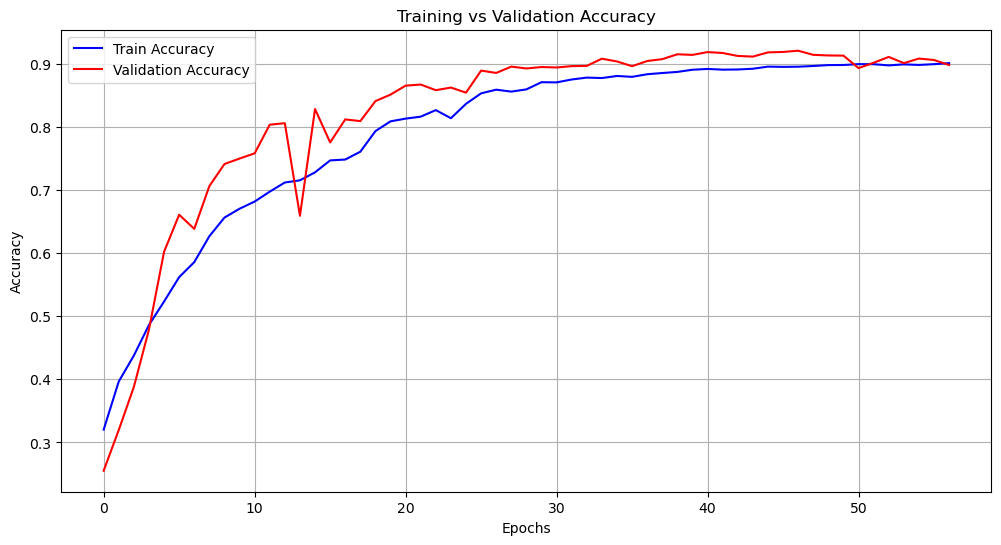

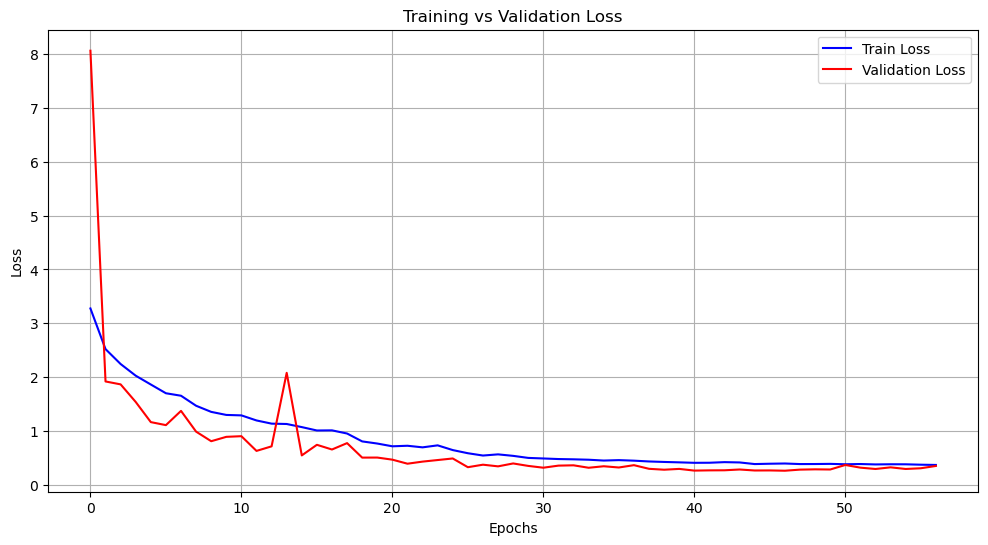

In [48]:
import matplotlib.pyplot as plt

# Plotting Training vs Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_scratch.history['accuracy'], label='Train Accuracy', color='b')
plt.plot(history_scratch.history['val_accuracy'], label='Validation Accuracy', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Training vs Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history_scratch.history['loss'], label='Train Loss', color='b')
plt.plot(history_scratch.history['val_loss'], label='Validation Loss', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


# Disease Model

In [13]:
# Check the number of images per disease class
disease_class_counts = train_data['disease_class'].value_counts()
print("Disease Class Distribution:")
print(disease_class_counts)


Disease Class Distribution:
disease_class
0     8237
10    4361
19    4312
11    3558
4     2451
13    2328
12    1663
16    1456
2     1368
17    1312
18    1136
8     1099
6      954
14     931
9      828
7      798
15     768
1      498
5      409
20     307
3      220
Name: count, dtype: int64


In [14]:
# Load only the necessary columns (image_name and disease_class) for now
train_data_diseases = train_data[['image_name', 'disease_class']]

# Check the first few rows to ensure the data is correct
print(train_data_diseases.head())


                                          image_name disease_class
0  4b22a1e7-745b-4c78-a49e-14ca8cfba26a___RS_HL-8...             0
1  9ee2b5e6-46cf-400f-a82f-660a2ac05157___RS_HL-5...             0
2  181ce194-fdc9-4f0b-ae8d-0c621f723279___RS_HL-7...             0
3  3e8eb97c-b2ad-4aeb-82ff-2f1334801c9b___RS_HL-6...             0
4  4e817ac6-818a-431f-af6d-e44477f9b649___RS_HL-7...             0


In [15]:
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import numpy as np

# Load only the necessary columns (image_name and disease_class) for now
train_data_disease = train_data[['image_name', 'disease_class']]

# Get the disease class labels (assuming these are already strings, so we need to convert to integers first)
y_disease = train_data_disease['disease_class'].astype(int).values  # Convert to int

# Apply SMOTE for oversampling (SMOTE requires numerical data)
smote = SMOTE(sampling_strategy='auto', random_state=42)

# We need to reshape X to match SMOTE input format; here X is just dummy data (zeros)
X_resampled_disease, y_disease_resampled = smote.fit_resample(np.zeros((len(y_disease), 1)), y_disease)

# Calculate class weights for the disease classes (requires integer labels)
disease_class_weights = compute_class_weight('balanced', classes=np.unique(y_disease), y=y_disease)
disease_weights = dict(zip(np.unique(y_disease), disease_class_weights))

# Print the class weights
print("Class Weights (for Disease Classes):")
print(disease_weights)

# Now, convert y_disease_resampled back to strings for compatibility with ImageGenerator
y_disease_resampled = y_disease_resampled.astype(str)

# Check the new distribution of disease classes after SMOTE
print("New Disease Class Distribution (After SMOTE):")
print(np.bincount(y_disease_resampled.astype(int)))  # Convert to int temporarily for counting


Class Weights (for Disease Classes):
{0: 0.22542881423541858, 1: 3.7286288009179573, 2: 1.3573517126148704, 3: 8.44025974025974, 4: 0.7575916535524858, 5: 4.539993014320642, 6: 1.9463911350703804, 7: 2.326888650196921, 8: 1.6895879370856624, 9: 2.2425810904071772, 10: 0.4257870082222295, 11: 0.5218822773628844, 12: 1.1165707413452453, 13: 0.7976190476190477, 14: 1.994475985883075, 15: 2.417782738095238, 16: 1.2753139717425432, 17: 1.415287456445993, 18: 1.6345573440643864, 19: 0.43062549695202756, 20: 6.04839460214053}
New Disease Class Distribution (After SMOTE):
[8237 8237 8237 8237 8237 8237 8237 8237 8237 8237 8237 8237 8237 8237
 8237 8237 8237 8237 8237 8237 8237]


## Training phase

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall, AUC
import numpy as np

# Load ResNet50 from scratch (no pre-trained weights)
base_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))

# Freeze the initial 100 layers
for layer in base_model.layers[:100]:
    layer.trainable = False

# Only the later layers are trainable
for layer in base_model.layers[100:]:
    layer.trainable = True

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)  # Dropout to prevent overfitting
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(len(np.unique(y_disease)), activation='softmax')(x)  # Use y_disease for output layer

# Define the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with a higher initial learning rate since we're starting from scratch
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Define callbacks for training
checkpoint_scratch_disease = ModelCheckpoint(filepath=r'C:\Users\bheja\OneDrive\Desktop\models\model_scratch_checkpoint_disease.h5',
                                             monitor='val_loss',
                                             save_best_only=True,
                                             save_weights_only=False,
                                             verbose=1)

# Define the ReduceLROnPlateau callback
reduce_lr_disease = ReduceLROnPlateau(
    monitor='val_loss',          # Monitor validation loss to decide when to reduce the learning rate
    factor=0.5,                  # Reduce learning rate by a factor of 0.5 (i.e., halve it)
    patience=3,                  # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-7,                 # Lower bound on the learning rate to prevent it from going too low
    verbose=1                    # Prints a message when learning rate is reduced
)

early_stop_disease = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model from scratch for disease classification
history_scratch_disease = model.fit(
    train_generator_disease,
    epochs=100,  # Training from scratch will need more epochs
    batch_size=8,
    validation_data=test_seen_generator_disease,
    class_weight=disease_weights,  # Use class weights for imbalance
    callbacks=[reduce_lr_disease, early_stop_disease, checkpoint_scratch_disease]
)


Epoch 1/100
1219/1219 [==============================] - ETA: 0s - loss: 4.5261 - accuracy: 0.1253 - precision_2: 0.2568 - recall_2: 0.0538 - auc_2: 0.6663
Epoch 1: val_loss improved from inf to 4.83319, saving model to C:\Users\bheja\OneDrive\Desktop\models\model_scratch_checkpoint_disease.h5
1219/1219 [==============================] - 1045s 850ms/step - loss: 4.5261 - accuracy: 0.1253 - precision_2: 0.2568 - recall_2: 0.0538 - auc_2: 0.6663 - val_loss: 4.8332 - val_accuracy: 0.0106 - val_precision_2: 7.1073e-04 - val_recall_2: 9.7286e-05 - val_auc_2: 0.4489 - lr: 0.0010
Epoch 2/100
 694/1219 [================>.............] - ETA: 5:46 - loss: 3.6864 - accuracy: 0.2009 - precision_2: 0.4025 - recall_2: 0.1031 - auc_2: 0.7528

## Testing on other Datasets